<a href="https://colab.research.google.com/github/G1r4s0l/ProyectoParteIII-Minos.ipynb/blob/main/ProyectoParteIII%2BMinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Este proyecto analiza la relación entre índices de criminalidad, seguridad y tasas de homicidios en los países con las tasas de criminalidad más altas del mundo, con especial enfoque en Argentina, que ocupa el puesto 18. Utilizando herramientas de análisis de datos y visualización en Python, el objetivo es identificar patrones clave, explorar correlaciones y predecir tendencias para comprender mejor la dinámica de la seguridad en diferentes contextos sociopolíticos.**

---

---

*    *A partir de un análisis comparativo, se observa que Venezuela lidera con un índice de criminalidad de 82.65 y un índice de seguridad de 17.35, mostrando una clara relación inversa. En contraste, Argentina presenta un índice de criminalidad de 64.27 y una seguridad de 35.73, posicionándose como un caso intermedio. Gráficos de barras y tortas reflejan estas diferencias y destacan cómo Sudáfrica y Honduras, con índices de criminalidad similares (75.37 y 74.24 respectivamente), tienen percepciones de seguridad significativamente distintas.*
*  *Un modelo predictivo sugiere una disminución gradual en la criminalidad de Argentina hacia 2030 si se mantienen políticas efectivas, mientras que países como Venezuela podrían enfrentar mayores desafíos. La correlación positiva entre las tasas de homicidios y criminalidad, evidenciada en gráficos de dispersión, reafirma esta tendencia y plantea preguntas como: ¿cómo afecta la percepción de seguridad a las políticas públicas? ¿Qué factores diferencian a Argentina de países con tasas similares?*




---

**Preguntas importantes en análisis predictivo**  

1.   ¿Cómo se compara el índice de criminalidad y seguridad de Argentina frente a los países con mayores índices de criminalidad en 2024?
2.   ¿Qué tendencias futuras se pueden observar en los índices de criminalidad, seguridad y tasa de homicidios de Argentina y otros países seleccionados?
3. ¿Cómo se distribuyen los índices de criminalidad, seguridad y la tasa de homicidios en los países seleccionados en 2024?
4.  ¿Qué relación existe entre la criminalidad, la seguridad y una métrica combinada (latencia) en el contexto global?
5. ¿Cuáles son las principales características que diferencian a los países seleccionados en cuanto a criminalidad y seguridad en 2024?



---


  Este análisis nos ayudará no solo a comprender el presente, sino también a predecir el futuro de la seguridad global y a informar las intenciones de las políticas públicas. herramientas que le ayudarán a tomar decisiones.

---



---








Datos nulos por columna:
Puesto                                     0
País                                       0
Año                                        0
Índice de Criminalidad                     0
Índice de Seguridad                        0
Población (millones)                       0
Densidad Poblacional (hab/km²)             0
Tasa de Homicidios                         0
PIB per cápita (USD)                       0
Índice de Desigualdad                      0
Tasa de Empleo (%)                         0
Nivel Educativo (años)                     0
Esperanza de Vida (años)                   0
Tasa de Corrupción                         0
Infraestructura de Seguridad (0-10)        0
Gastos en Seguridad Pública (% del PIB)    0
dtype: int64
Datos después de limpiar nulos: (2000, 16)

Descripción del dataset:
            Puesto          Año  Índice de Criminalidad  Índice de Seguridad  \
count  2000.000000  2000.000000             2000.000000          2000.000000   
mean   1000.5

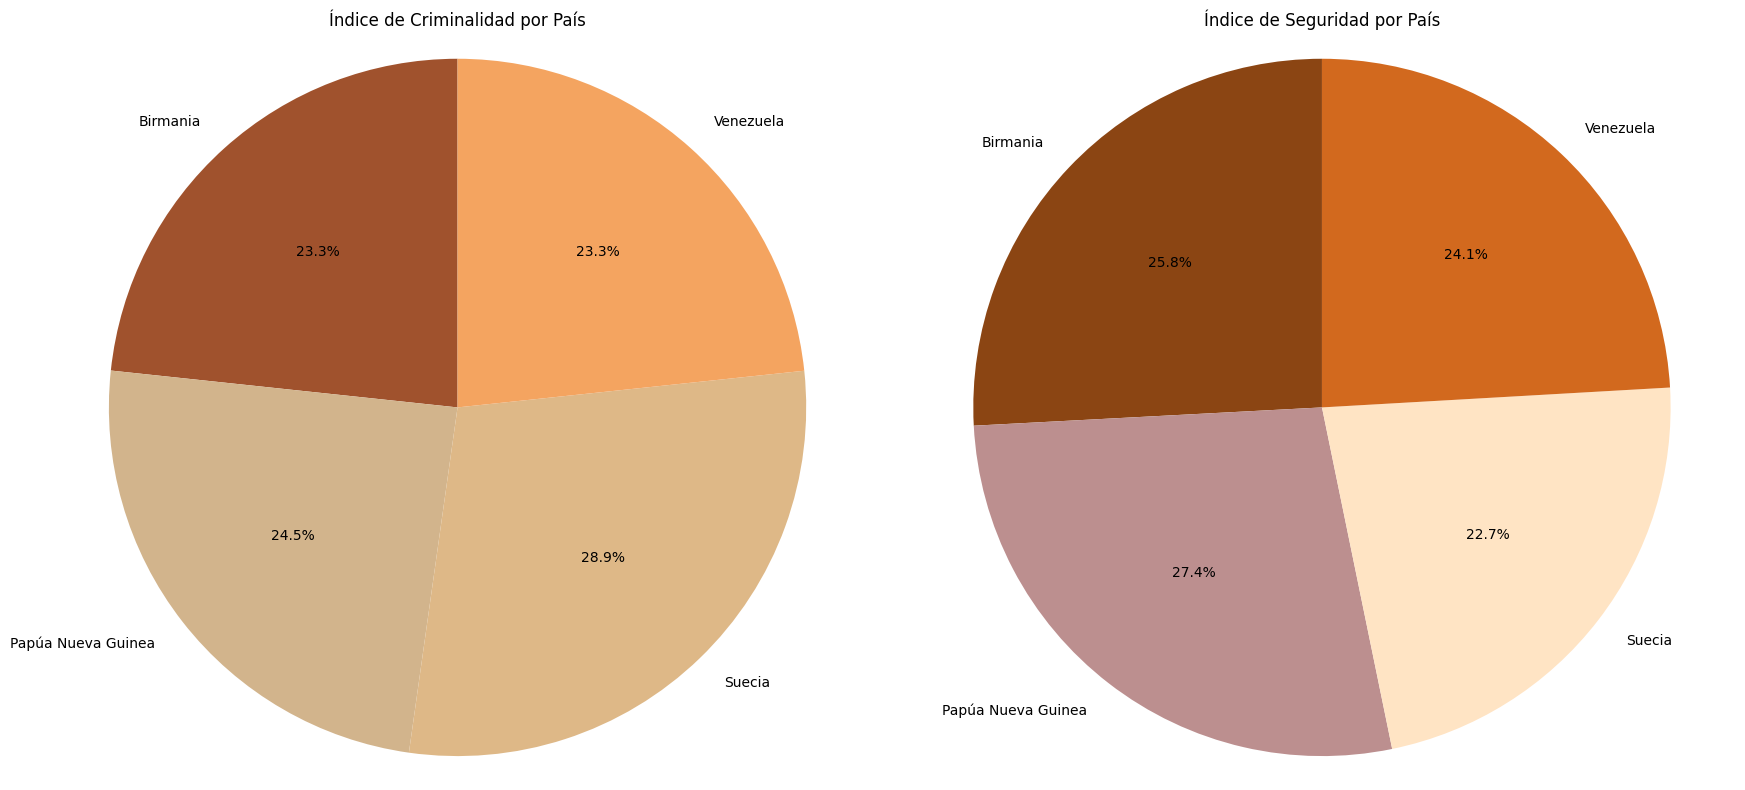

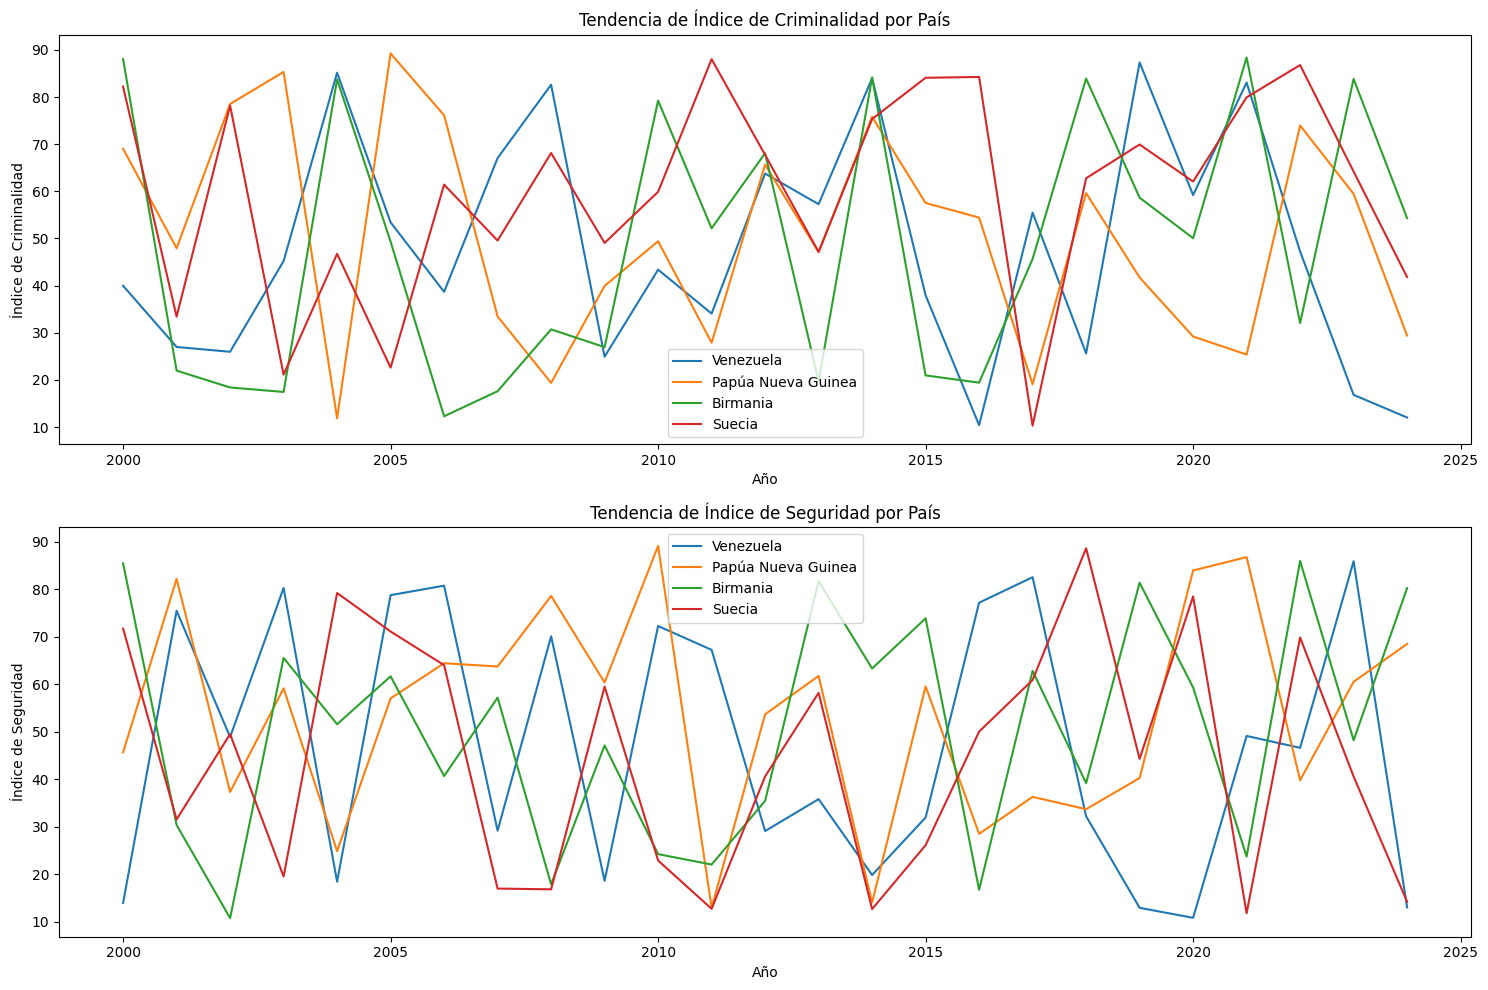

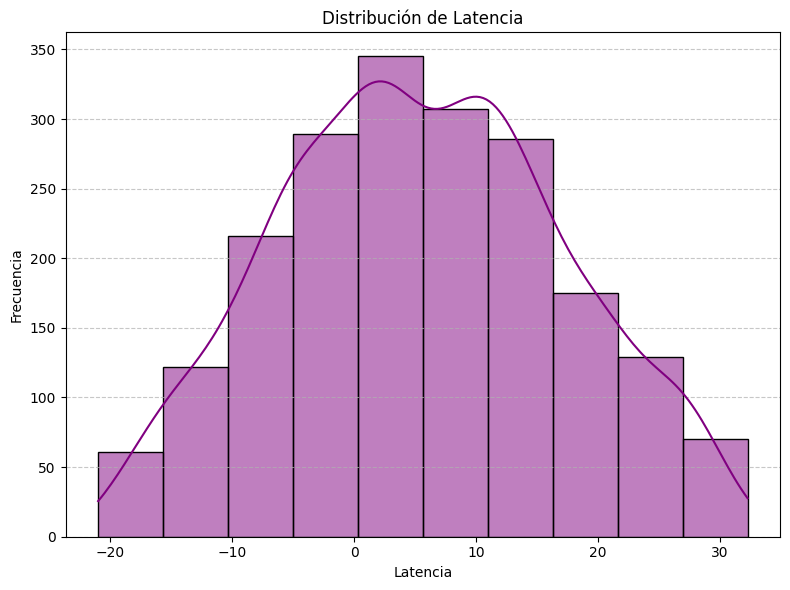


Precisión del modelo: 0.99

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       303
           1       0.98      0.99      0.99       297

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



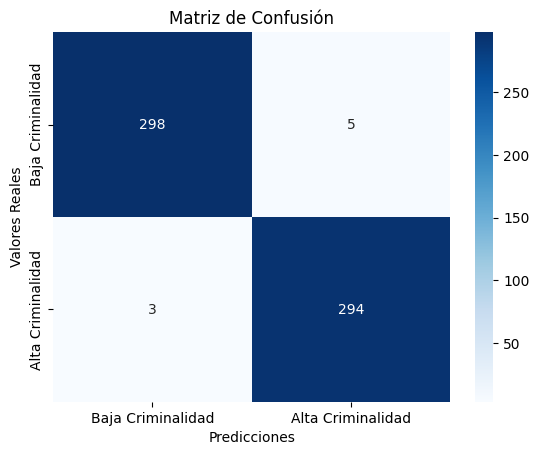

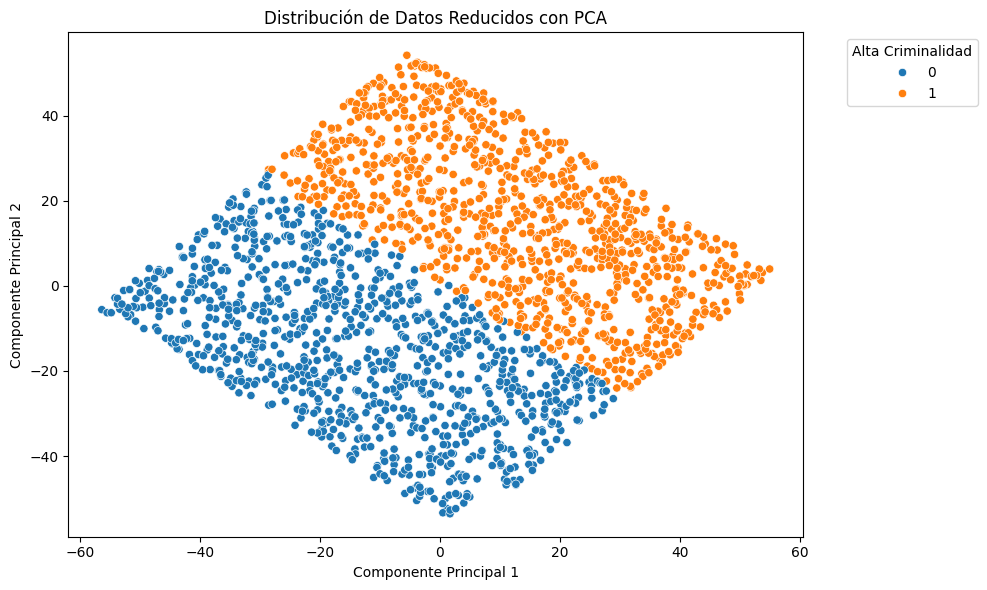

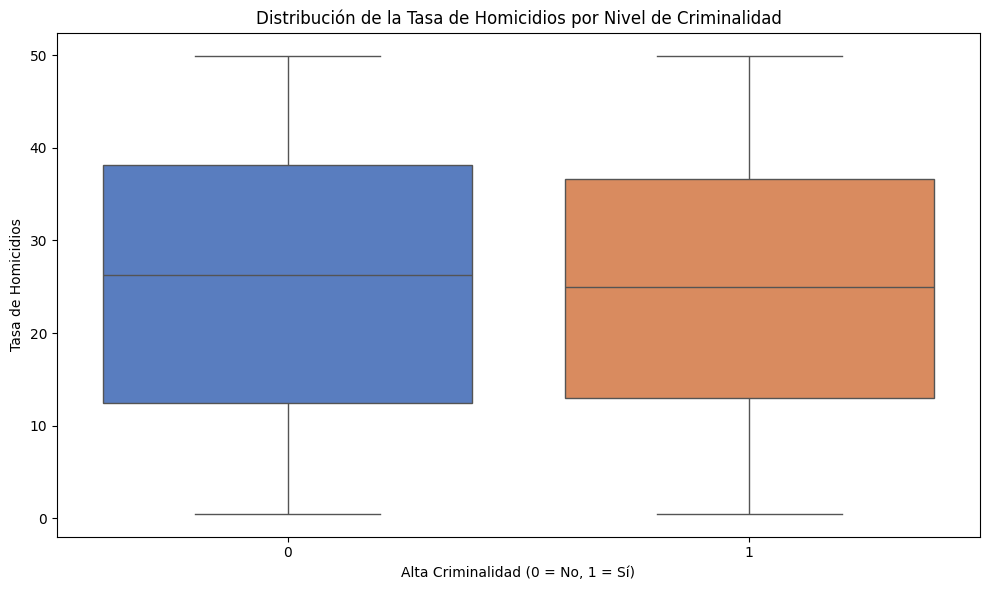


Conclusiones:
- Se limpiaron los datos nulos y se definieron características clave.
- Se realizaron análisis gráficos que muestran tendencias y distribuciones importantes.
- Se utilizó PCA para reducir la dimensionalidad del conjunto de datos.
- El modelo Random Forest mostró una precisión del 0.99


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Cargar datos
df = pd.read_csv("estadistica_expandida.csv")

# 1. Preprocesamiento de datos
# Verificar valores nulos
print("Datos nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con datos nulos
df_clean = df.dropna()
print(f"Datos después de limpiar nulos: {df_clean.shape}")

# Descripción del dataset
print("\nDescripción del dataset:")
print(df_clean.describe())

# Identificación de variables
print("\nVariables presentes en el dataset:")
print(df_clean.columns)

# 2. Crear una variable binaria para clasificación (alta o baja criminalidad)
df_clean["Alta_Criminalidad"] = (df_clean["Índice de Criminalidad"] > df_clean["Índice de Criminalidad"].median()).astype(int)

# 3. Gráfico de tortas
countries = df_clean['País'].value_counts().index[:4]
countries_data = df_clean[df_clean['País'].isin(countries)]
criminality_index = countries_data.groupby('País')['Índice de Criminalidad'].mean()
security_index = countries_data.groupby('País')['Índice de Seguridad'].mean()

plt.figure(figsize=(18, 8))

# Criminalidad
plt.subplot(1, 2, 1)
plt.pie(criminality_index, labels=criminality_index.index, autopct='%1.1f%%', startangle=90, colors=['#A0522D', '#D2B48C', '#DEB887', '#F4A460'])
plt.title("Índice de Criminalidad por País")
plt.axis('equal')

# Seguridad
plt.subplot(1, 2, 2)
plt.pie(security_index, labels=security_index.index, autopct='%1.1f%%', startangle=90, colors=['#8B4513', '#BC8F8F', '#FFE4C4', '#D2691E'])
plt.title("Índice de Seguridad por País")
plt.axis('equal')

plt.tight_layout()
plt.show()

# 4. Análisis lineal
selected_countries = countries
filtered_data = df_clean[df_clean['País'].isin(selected_countries)]

plt.figure(figsize=(15, 10))
for i, variable in enumerate(["Índice de Criminalidad", "Índice de Seguridad"]):
    plt.subplot(2, 1, i + 1)
    for country in selected_countries:
        country_data = filtered_data[filtered_data['País'] == country]
        plt.plot(country_data['Año'], country_data[variable], label=country)
    plt.xlabel("Año")
    plt.ylabel(variable)
    plt.title(f"Tendencia de {variable} por País")
    plt.legend()

plt.tight_layout()
plt.show()

# 5. Distribución de Latencia
df_clean["Latencia"] = (df_clean["Índice de Criminalidad"] * 0.4) - (df_clean["Índice de Seguridad"] * 0.3)

plt.figure(figsize=(8, 6))
sns.histplot(df_clean["Latencia"], kde=True, color="purple", bins=10)
plt.title("Distribución de Latencia")
plt.xlabel("Latencia")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 6. Feature Selection con PCA (Reducción de Dimensionalidad)
X = df_clean[["Índice de Criminalidad", "Índice de Seguridad", "Tasa de Homicidios"]]
y = df_clean["Alta_Criminalidad"]

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 7. Entrenamiento de modelo (clasificación)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# 8. Evaluación del modelo
# Métricas básicas
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Baja Criminalidad", "Alta Criminalidad"], yticklabels=["Baja Criminalidad", "Alta Criminalidad"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# 9. Visualización (Gráfico de dispersión 2D)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="tab10", legend="full")
plt.title("Distribución de Datos Reducidos con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Alta Criminalidad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 10. Gráfico de boxplot - Actualizado para eliminar el warning
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x="Alta_Criminalidad", y="Tasa de Homicidios", hue="Alta_Criminalidad", palette="muted", legend=False)
plt.title("Distribución de la Tasa de Homicidios por Nivel de Criminalidad")
plt.xlabel("Alta Criminalidad (0 = No, 1 = Sí)")
plt.ylabel("Tasa de Homicidios")
plt.tight_layout()
plt.show()

# 11. Conclusiones
print("\nConclusiones:")
print("- Se limpiaron los datos nulos y se definieron características clave.")
print("- Se realizaron análisis gráficos que muestran tendencias y distribuciones importantes.")
print("- Se utilizó PCA para reducir la dimensionalidad del conjunto de datos.")
print("- El modelo Random Forest mostró una precisión del {:.2f}".format(accuracy))


#  **Conclusión**


***Los gráficos muestran claramente que Argentina se posiciona mejor que los países con mayores índices de criminalidad, con predicciones optimistas hacia 2030. Sin embargo, las diferencias en percepciones de seguridad, tasas de homicidios y métricas combinadas como la latencia subrayan la importancia de políticas preventivas sostenibles. Los patrones globales indican que la mejora en índices de seguridad depende de estrategias multidimensionales que incluyan justicia, desarrollo social y confianza pública.***